In [1]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
df= pd.read_csv('studentmath.csv')

In [3]:
def assign_cat_codes(df, col_name):
    col_index = df.columns.get_loc(col_name)
    df[col_name] = df[col_name].astype('category')
    df.insert(col_index + 1, f'{col_name}_cat', df[col_name].cat.codes)
    df.drop(columns=[col_name], inplace=True)
    
columns_to_convert = ['school', 'sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

for col in columns_to_convert:
    assign_cat_codes(df, col)
    

In [4]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
# Perform RFE with cross-validation
rfe_cv = RFECV(RandomForestRegressor(n_estimators=100, random_state=0), scoring='neg_mean_absolute_error', cv=10)
rfe_cv.fit(X, y)

# Get the optimal number of features
optimal_n = rfe_cv.n_features_
print('Optimal number of features:', optimal_n)

# Get the mask of selected features
selected_features_mask = rfe_cv.support_

# Print the selected feature names
selected_feature_names = np.array(X.columns)[selected_features_mask]
print("Selected features:", selected_feature_names)

# Create a new DataFrame with the selected features
X_selected = X.iloc[:, selected_features_mask]

X= X_selected


Optimal number of features: 5
Selected features: ['age' 'famrel' 'health' 'absences' 'G2']


In [5]:
X

,age,famrel,health,absences,G2
0,18,4,3,6,6
1,17,5,3,4,5
2,15,4,3,10,8
3,15,3,5,2,14
4,16,4,5,4,10
...,...,...,...,...,...
390,20,5,4,11,9
391,17,2,2,3,16
392,21,5,3,3,8
393,18,4,5,0,12


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Random Forest
start_time_rf = time.time()
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_rf = time.time() - start_time_rf
print("Runtime for Random Forest:", runtime_rf)
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_rf) * -1)
print()


# Decision Tree
start_time_dt = time.time()
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_dt = time.time() - start_time_dt
print("Runtime for Decision Tree:", runtime_dt)
#print("Results for Decision Tree:")
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_dt) * -1)
print()

# K-Nearest Neighbors
start_time_knn = time.time()
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_knn = time.time() - start_time_knn
print("Runtime for K-Nearest Neighbors:", runtime_knn)
#print("Mean Absolute Error (Train):", np.mean(scores_knn) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_knn) * -1)
print()


# XGBoost
start_time_xgb = time.time()
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_xgb = time.time() - start_time_xgb
print("Runtime for XGBoost:", runtime_xgb)
#print("Mean Absolute Error (Train):", np.mean(scores_xgb) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_xgb) * -1)
print()



Runtime for Random Forest: 2.2381157875061035
Mean Absolute Error (Test): 1.5291502976190476

Runtime for Decision Tree: 0.045828819274902344
Mean Absolute Error (Test): 1.7169642857142857

Runtime for K-Nearest Neighbors: 0.02480936050415039
Mean Absolute Error (Test): 1.8675000000000002

Runtime for XGBoost: 1430.883388519287
Mean Absolute Error (Test): 1.8035741832373398



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)

1.5291502976190476
1.7169642857142857
1.8675000000000002
1.8035741832373398


In [8]:
X1=X

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-53ed27d19f19>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-14-53ed27d19f19>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val

Runtime for Proposed: 581.6610136032104


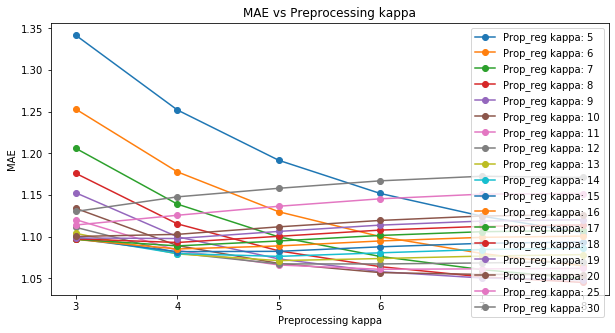

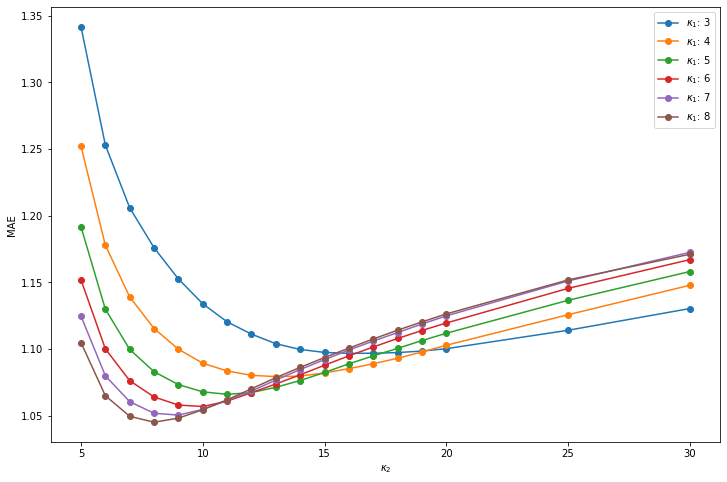

Optimal Preprocessing kappa: 8
Optimal Prop_reg kappa: 8
Minimum MAE: 1.0451561458572756


In [14]:
start_time_pr = time.time()
def normalize(X1):
    result = X1.copy()
    for feature_name in X1.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

X = normalize(X1)
X
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



ordinal_columns = ['age', 'famrel', 'health', 'absences' ,'G2']

kappa_values_preprocessing = [3,4,5,6,7,8]
kappa_values_prop_reg = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)

runtime_pr = time.time() - start_time_pr
print("Runtime for Proposed:", runtime_pr)



# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"$\\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\\kappa_2$')
plt.ylabel('MAE')
plt.legend()

# Save the plot as a PDF
plt.savefig('studentfeature_mae_vs_predicting_kappa.pdf', format='pdf')

# Show the plot
plt.show()



    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


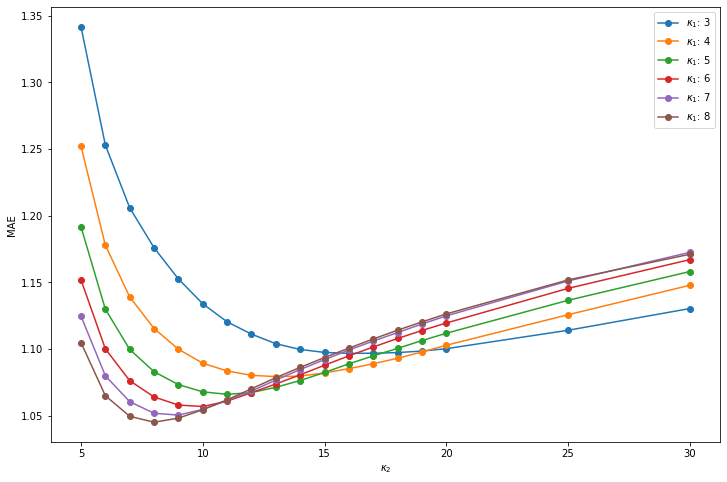

In [13]:
plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"$\\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\\kappa_2$')
plt.ylabel('MAE')
plt.legend()

# Save the plot as a PDF
plt.savefig('student_mae_vs_predicting_kappa.pdf', format='pdf')

# Show the plot
plt.show()


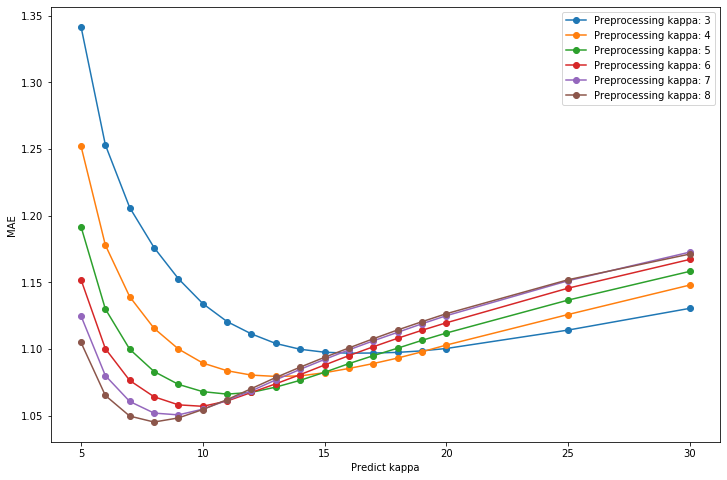

In [10]:
# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Predict kappa')
plt.ylabel('MAE')
plt.legend()
# Save the plot as a PDF
plt.savefig('studentfull_mae_vs_predicting_kappa.pdf', format='pdf')
plt.show()

In [11]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))
 
# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))

Kappa combinations and their MAE values:
(3, 5, 1.3416606662246278)
(3, 6, 1.2530103564475292)
(3, 7, 1.2059780315426898)
(3, 8, 1.1759905416463707)
(3, 9, 1.1526252095255125)
(3, 10, 1.1340056318641025)
(3, 11, 1.12047235926112)
(3, 12, 1.111228257556514)
(3, 13, 1.1040620727367996)
(3, 14, 1.0997349318924916)
(3, 15, 1.0975154989928282)
(3, 16, 1.096797522887257)
(3, 17, 1.0969195832384306)
(3, 18, 1.0973880892345664)
(3, 19, 1.0985335523371826)
(3, 20, 1.1003032034831313)
(3, 25, 1.1141120777901146)
(3, 30, 1.1304047017428893)
(4, 5, 1.2521006304737226)
(4, 6, 1.177855265549241)
(4, 7, 1.13913615967625)
(4, 8, 1.1154447682030786)
(4, 9, 1.0999378795742105)
(4, 10, 1.089408547735901)
(4, 11, 1.0836253272658578)
(4, 12, 1.0803424240837207)
(4, 13, 1.0793677040934604)
(4, 14, 1.079756873072142)
(4, 15, 1.0821337146402956)
(4, 16, 1.0853245708285715)
(4, 17, 1.0890054450305793)
(4, 18, 1.0931188466384356)
(4, 19, 1.0978286931913146)
(4, 20, 1.1028785554482168)
(4, 25, 1.1257723339081231

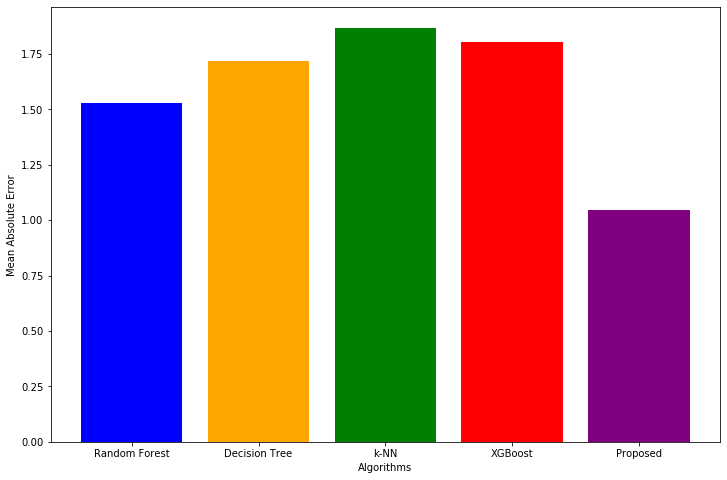

In [12]:
# Results data
results = {
    'Random Forest': 1.529,
    'Decision Tree': 1.717,
    'k-NN': 1.868,
    'XGBoost': 1.804,
    'Proposed': 1.045,
}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Absolute Error')

# Save the plot as a PDF
plt.savefig('studentfeatureresults_bar_graph.pdf', format='pdf')

# Show the plot
plt.show()

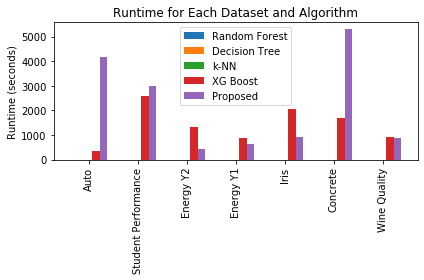

In [15]:
import numpy as np
import matplotlib.pyplot as plt

datasets = ['Auto', 'Student Performance', 'Energy Y2', 'Energy Y1', 'Iris', 'Concrete', 'Wine Quality']

# Runtimes for each algorithm
random_forest = [2.05, 2.37, 2.75, 2.25, 3.50, 3.51, 4.52]
decision_tree = [0.05, 0.05, 0.06, 0.05, 0.05, 0.07, 0.08]
k_nn = [0.03, 0.03, 0.04, 0.03, 0.03, 0.03, 0.02]
xg_boost = [333.94, 2581.31, 1333.79, 882.83, 2037.48, 1684.85, 936.43]
proposed = [4150.11, 2976.47, 435.04, 643.12, 903.76, 5307.87, 874.42]

barWidth = 0.15
x = np.arange(len(datasets))

plt.bar(x - 2*barWidth, random_forest, width=barWidth, label='Random Forest')
plt.bar(x - barWidth, decision_tree, width=barWidth, label='Decision Tree')
plt.bar(x, k_nn, width=barWidth, label='k-NN')
plt.bar(x + barWidth, xg_boost, width=barWidth, label='XG Boost')
plt.bar(x + 2*barWidth, proposed, width=barWidth, label='Proposed')

plt.xticks(x, datasets, rotation='vertical')
plt.ylabel("Runtime (seconds)")
plt.title("Runtime for Each Dataset and Algorithm")
plt.legend()

plt.tight_layout()
plt.show()
